In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)
import pickle

In [2]:
#pip install plotly

In [3]:
from IPython.display import display

# Load your DataFrame (replace 'your_data.csv' with the actual filename)
d = pd.read_csv('kidney_disease.csv')

# Set the display option to show all columns
pd.set_option('display.max_columns', None)

# Display the DataFrame
display(d)


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
d.shape

(400, 26)

In [5]:
# Delete columns 'B' and 'D'
df = d.drop(['id', 'sg', 'rbc', 'ba', 'bgr', 'sod', 'pot', 'pcv', 'htn', 'cad', 'pe', 'dm', 'appet', 'ane', 'pcc' ], axis=1)

# Display the DataFrame after deleting the columns
df


,age,bp,al,su,pc,bu,sc,hemo,wc,rc,classification
0,48.0,80.0,1.0,0.0,normal,36.0,1.2,15.4,7800,5.2,ckd
1,7.0,50.0,4.0,0.0,normal,18.0,0.8,11.3,6000,NaN,ckd
2,62.0,80.0,2.0,3.0,normal,53.0,1.8,9.6,7500,NaN,ckd
3,48.0,70.0,4.0,0.0,abnormal,56.0,3.8,11.2,6700,3.9,ckd
4,51.0,80.0,2.0,0.0,normal,26.0,1.4,11.6,7300,4.6,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,0.0,0.0,normal,49.0,0.5,15.7,6700,4.9,notckd
396,42.0,70.0,0.0,0.0,normal,31.0,1.2,16.5,7800,6.2,notckd
397,12.0,80.0,0.0,0.0,normal,26.0,0.6,15.8,6600,5.4,notckd
398,17.0,60.0,0.0,0.0,normal,50.0,1.0,14.2,7200,5.9,notckd


In [6]:
# rename column names to make it more user-friendly
df.columns = ['age', 'blood_pressure','albumin', 'sugar',
              'pus_cell', 'blood_urea', 'serum_creatinine',
              'haemoglobin', 'white_blood_cell_count', 'red_blood_cell_count',
              'class']

In [7]:
df.head()

,age,blood_pressure,albumin,sugar,pus_cell,blood_urea,serum_creatinine,haemoglobin,white_blood_cell_count,red_blood_cell_count,class
0,48.0,80.0,1.0,0.0,normal,36.0,1.2,15.4,7800,5.2,ckd
1,7.0,50.0,4.0,0.0,normal,18.0,0.8,11.3,6000,NaN,ckd
2,62.0,80.0,2.0,3.0,normal,53.0,1.8,9.6,7500,NaN,ckd
3,48.0,70.0,4.0,0.0,abnormal,56.0,3.8,11.2,6700,3.9,ckd
4,51.0,80.0,2.0,0.0,normal,26.0,1.4,11.6,7300,4.6,ckd


In [8]:
df.describe()

,age,blood_pressure,albumin,sugar,blood_urea,serum_creatinine,haemoglobin
count,391.000000,388.000000,354.000000,351.000000,381.000000,383.000000,348.000000
mean,51.483376,76.469072,1.016949,0.450142,57.425722,3.072454,12.526437
std,17.169714,13.683637,1.352679,1.099191,50.503006,5.741126,2.912587
min,2.000000,50.000000,0.000000,0.000000,1.500000,0.400000,3.100000
25%,42.000000,70.000000,0.000000,0.000000,27.000000,0.900000,10.300000
50%,55.000000,80.000000,0.000000,0.000000,42.000000,1.300000,12.650000
75%,64.500000,80.000000,2.000000,0.000000,66.000000,2.800000,15.000000
max,90.000000,180.000000,5.000000,5.000000,391.000000,76.000000,17.800000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     391 non-null    float64
 1   blood_pressure          388 non-null    float64
 2   albumin                 354 non-null    float64
 3   sugar                   351 non-null    float64
 4   pus_cell                335 non-null    object 
 5   blood_urea              381 non-null    float64
 6   serum_creatinine        383 non-null    float64
 7   haemoglobin             348 non-null    float64
 8   white_blood_cell_count  295 non-null    object 
 9   red_blood_cell_count    270 non-null    object 
 10  class                   400 non-null    object 
dtypes: float64(7), object(4)
memory usage: 34.5+ KB


In [10]:
# converting necessary columns to numerical type

# df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     391 non-null    float64
 1   blood_pressure          388 non-null    float64
 2   albumin                 354 non-null    float64
 3   sugar                   351 non-null    float64
 4   pus_cell                335 non-null    object 
 5   blood_urea              381 non-null    float64
 6   serum_creatinine        383 non-null    float64
 7   haemoglobin             348 non-null    float64
 8   white_blood_cell_count  294 non-null    float64
 9   red_blood_cell_count    269 non-null    float64
 10  class                   400 non-null    object 
dtypes: float64(9), object(2)
memory usage: 34.5+ KB


In [12]:
# Extracting categorical and numerical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [13]:
# looking at unique values in categorical columns
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

pus_cell has ['normal' 'abnormal' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [14]:
# # replace incorrect values
# df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

# df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [15]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [16]:
# cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']
cols = ['class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

class has [0 1] values



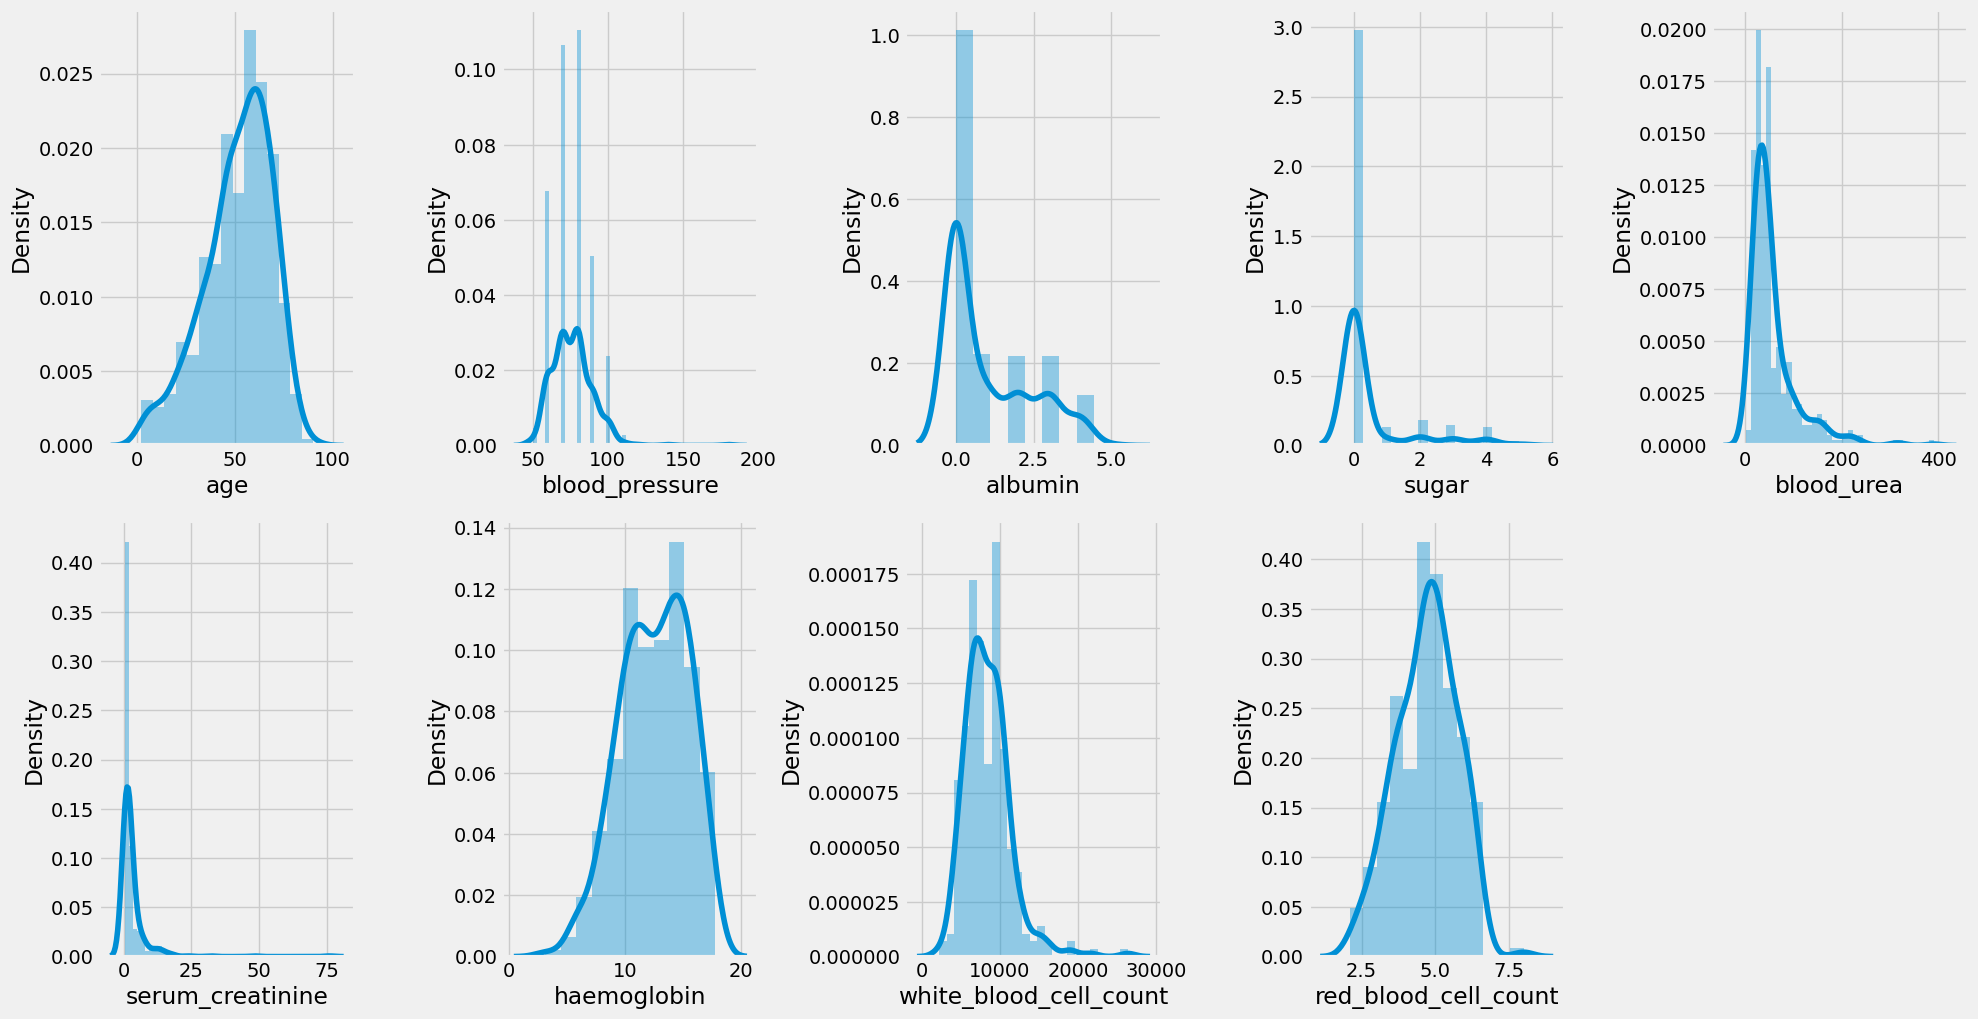

In [17]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

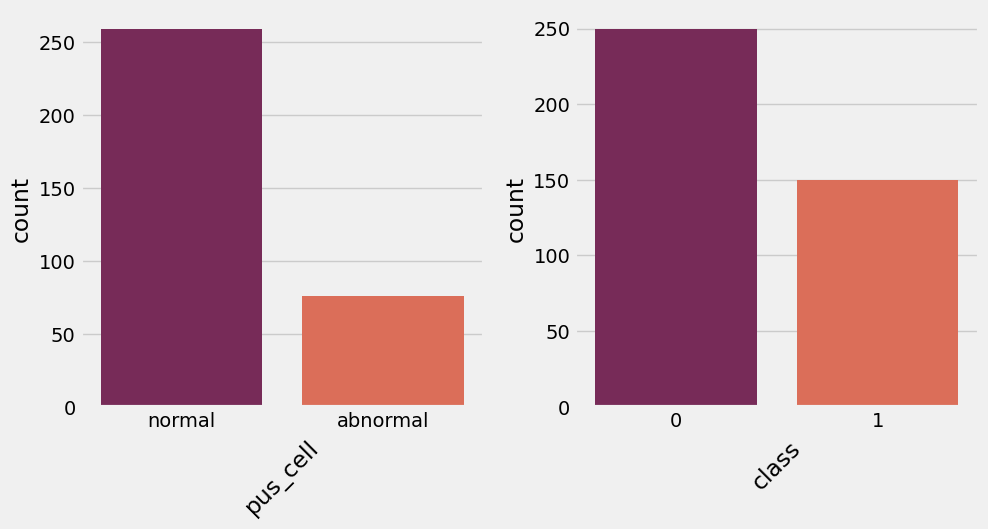

In [18]:
# Looking at categorical columns

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(data=df, x=column, palette='rocket')
        plt.xlabel(column, rotation=45)  # Add rotation for better readability
    plotnumber += 1

plt.tight_layout()
plt.show()


In [19]:
# checking for null values

df.isna().sum().sort_values(ascending = False)

red_blood_cell_count      131
white_blood_cell_count    106
pus_cell                   65
haemoglobin                52
sugar                      49
albumin                    46
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
class                       0
dtype: int64

In [20]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
albumin                    46
sugar                      49
blood_urea                 19
serum_creatinine           17
haemoglobin                52
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [21]:
df[cat_cols].isnull().sum()

pus_cell    65
class        0
dtype: int64

In [22]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [23]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [24]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
albumin                   0
sugar                     0
blood_urea                0
serum_creatinine          0
haemoglobin               0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [25]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

# random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [26]:
df[cat_cols].isnull().sum()

pus_cell    0
class       0
dtype: int64

In [27]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

pus_cell has 2 categories

class has 2 categories



In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [29]:
df.head()

,age,blood_pressure,albumin,sugar,pus_cell,blood_urea,serum_creatinine,haemoglobin,white_blood_cell_count,red_blood_cell_count,class
0,48.0,80.0,1.0,0.0,1,36.0,1.2,15.4,7800.0,5.2,0
1,7.0,50.0,4.0,0.0,1,18.0,0.8,11.3,6000.0,6.2,0
2,62.0,80.0,2.0,3.0,1,53.0,1.8,9.6,7500.0,5.2,0
3,48.0,70.0,4.0,0.0,0,56.0,3.8,11.2,6700.0,3.9,0
4,51.0,80.0,2.0,0.0,1,26.0,1.4,11.6,7300.0,4.6,0


In [30]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [31]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [32]:
rd_clf = RandomForestClassifier(
    criterion='entropy',
    max_depth=11,
    max_features='sqrt',  # or 'log2', or an integer value
    min_samples_leaf=2,
    min_samples_split=3,
    n_estimators=130
)
rd_clf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=11, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [33]:
# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

In [34]:
print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 0.9892857142857143
Test Accuracy of Random Forest Classifier is 0.9416666666666667 

Confusion Matrix :- 
[[70  2]
 [ 5 43]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        72
           1       0.96      0.90      0.92        48

    accuracy                           0.94       120
   macro avg       0.94      0.93      0.94       120
weighted avg       0.94      0.94      0.94       120



In [35]:
import joblib


# Assuming you have already trained your model and it's stored in the variable `rf_classifier`
# Replace 'rf_classifier' with your actual model variable

# Save the model to a .pkl file
joblib.dump(rd_clf, 'kidney.pkl')

# Replace 'trained_model.pkl' with the desired file name and path


['kidney.pkl']